In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from config import RAW_DATA_DIR

### Shelter Locations

In [38]:
xls_path = RAW_DATA_DIR / "shelter-locations-readme.xls" 

xls = pd.ExcelFile(xls_path, engine="xlrd")
print(xls.sheet_names)  # see which sheets exist

df = pd.read_excel(
    xls_path,
    engine="xlrd",
    header=1,       # Real headers start on the second row
    usecols="A:C"   # Item name, Description, Datatype cols
)

pd.set_option("display.max_colwidth", None)
pd.set_option("display.width", 0)

df = df.dropna(how="all").reset_index(drop=True)
df.columns = ["ITEM_NAME", "DESCRIPTION", "DATATYPE"]
df = df.drop(0)
df


['Sheet1', 'Sheet2', 'Sheet3']


,ITEM_NAME,DESCRIPTION,DATATYPE
1,FID,Feature ID,Numeric
2,SHAPE,Feature type e.g. point,NaN
3,ADDRESS_PO,Unique geographical Address Identifier,Numeric
4,ADDRESS_FU,Full municipal address,NaN
5,POSTAL_COD,Postal code,NaN
6,MUNICIPALI,Former city municipality,NaN
7,CITY,Toronto,NaN
8,CENTRELINE,The unique geographic identifier of the street segment the address is on,Numeric
9,OBJECTID,Object identifier,Numeric
10,WARD,Toronto Electoral Ward name and number,NaN


In [41]:
import geopandas as gpd

gdf = gpd.read_file(RAW_DATA_DIR / "shelters_wgs84.shp")
gdf.head(5)

gdf.to_csv(RAW_DATA_DIR / "shelter_wgs8.csv")

In [22]:
gdf.isna().sum()

ADDRESS_PO     0
ADDRESS_FU     0
POSTAL_COD     1
MUNICIPALI     0
CITY           0
CENTRELINE     0
OBJECTID       0
WARD           0
NEIGHBOURH     0
NEIGHBOU_1     0
COMMUNITY_     0
CONFIDENTI     0
MOTEL         55
CAPACITY       0
NAME           0
TYPE           0
TYPE2          0
CITY_OP       45
geometry       0
dtype: int64

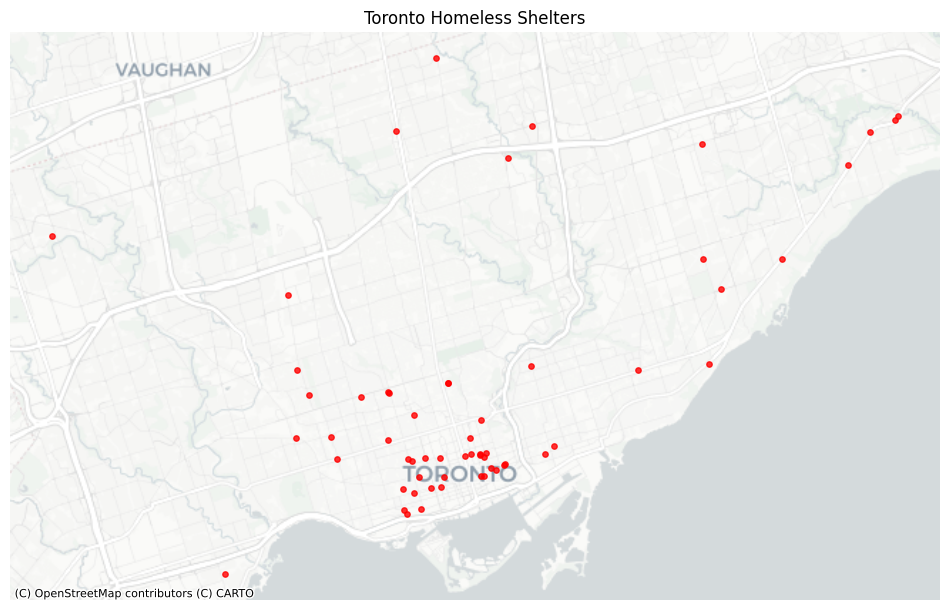

In [36]:
import contextily as cx

shelters_webmer = gdf.to_crs(epsg=3857)

ax = shelters_webmer.plot(figsize=(12, 10), color='red', markersize=15, alpha=0.8)
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
plt.title("Toronto Homeless Shelters")
plt.axis("off")
plt.show()

### Daily Shelter & Overnight Service Occupancy & Capacity

In [40]:
daily_occ_cap = pd.read_csv(RAW_DATA_DIR / "daily-shelter-overnight-service-occupancy-capacity-2024.csv")
pd.set_option("display.max_columns", None)
daily_occ_cap.head()


,_id,OCCUPANCY_DATE,ORGANIZATION_ID,ORGANIZATION_NAME,SHELTER_ID,SHELTER_GROUP,LOCATION_ID,LOCATION_NAME,LOCATION_ADDRESS,LOCATION_POSTAL_CODE,LOCATION_CITY,LOCATION_PROVINCE,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,CAPACITY_FUNDING_BED,OCCUPIED_BEDS,UNOCCUPIED_BEDS,UNAVAILABLE_BEDS,CAPACITY_ACTUAL_ROOM,CAPACITY_FUNDING_ROOM,OCCUPIED_ROOMS,UNOCCUPIED_ROOMS,UNAVAILABLE_ROOMS,OCCUPANCY_RATE_BEDS,OCCUPANCY_RATE_ROOMS
0,1,2024-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1320.0,COSTI Hotel Program Dixon,640 Dixon Rd.,M9W 1J1,Toronto,ON,16892,COSTI - Hotel Program - Dixon (Refugee Families),Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,650,Room Based Capacity,NaN,NaN,NaN,NaN,NaN,149.0,150.0,149.0,0.0,1.0,NaN,100.0
1,2,2024-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1320.0,COSTI Hotel Program Dixon,640 Dixon Rd.,M9W 1J1,Toronto,ON,16891,COSTI - Hotel Program - Dixon (Refugee Singles),Mixed Adult,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,113,Room Based Capacity,NaN,NaN,NaN,NaN,NaN,57.0,57.0,57.0,0.0,0.0,NaN,100.0
2,3,2024-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1051.0,COSTI Reception Centre,100 Lippincott St,M5S 2P1,Toronto,ON,12251,COSTI Reception Centre CITY Program,Mixed Adult,Emergency,Shelter,Base Program - Refugee,8,Bed Based Capacity,8.0,8.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN
3,4,2024-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1114.0,COSTI Uptown Hotel Program,55 Hallcrown Pl,M2J 4R1,North York,ON,15372,COSTI Uptown Hotel COVID-19 - Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Programs,203,Room Based Capacity,NaN,NaN,NaN,NaN,NaN,67.0,83.0,67.0,0.0,16.0,NaN,100.0
4,5,2024-01-01,24,COSTI Immigrant Services,40,COSTI Reception Centre,1114.0,COSTI Uptown Hotel Program,55 Hallcrown Pl,M2J 4R1,North York,ON,13751,COSTI Uptown Hotel Family Program,Families,Emergency,Motel/Hotel Shelter,Temporary Refugee Response,508,Room Based Capacity,NaN,NaN,NaN,NaN,NaN,161.0,148.0,161.0,0.0,0.0,NaN,100.0


In [13]:
daily_occ_cap.isna().sum()

_id                           0
OCCUPANCY_DATE                0
ORGANIZATION_ID               0
ORGANIZATION_NAME             0
SHELTER_ID                    0
SHELTER_GROUP                 0
LOCATION_ID                   5
LOCATION_NAME               371
LOCATION_ADDRESS           2192
LOCATION_POSTAL_CODE       2166
LOCATION_CITY              2181
LOCATION_PROVINCE          2181
PROGRAM_ID                    0
PROGRAM_NAME                  0
SECTOR                        0
PROGRAM_MODEL                 0
OVERNIGHT_SERVICE_TYPE        0
PROGRAM_AREA                  0
SERVICE_USER_COUNT            0
CAPACITY_TYPE                 0
CAPACITY_ACTUAL_BED       14028
CAPACITY_FUNDING_BED      14028
OCCUPIED_BEDS             14028
UNOCCUPIED_BEDS           14028
UNAVAILABLE_BEDS          14028
CAPACITY_ACTUAL_ROOM      34766
CAPACITY_FUNDING_ROOM     34766
OCCUPIED_ROOMS            34766
UNOCCUPIED_ROOMS          34766
UNAVAILABLE_ROOMS         34766
OCCUPANCY_RATE_BEDS       14028
OCCUPANC

### Shelter System Flow

In [37]:
sys_flow = pd.read_csv(RAW_DATA_DIR / "toronto-shelter-system-flow.csv")
sys_flow.head()

,_id,date(mmm-yy),population_group,returned_from_housing,returned_to_shelter,newly_identified,moved_to_housing,became_inactive,actively_homeless,ageunder16,age16-24,age25-34,age35-44,age45-54,age55-64,age65over,gender_male,gender_female,"gender_transgender,non-binary_or_two_spirit",population_group_percentage
0,1,Jan-18,All Population,46,494,1106,508,862,7958,1233,1111,1341,1560,1318,973,422,4963,2912,83,100.0%
1,2,Jan-18,Chronic,11,29,317,111,111,2532,223,346,313,403,505,495,247,1632,870,30,31.8%
2,3,Jan-18,Refugees,4,32,651,328,75,2408,914,241,414,547,204,66,22,1219,1177,12,30.3%
3,4,Jan-18,Families,0,14,561,321,57,2277,1232,187,276,411,130,23,18,968,1308,1,28.6%
4,5,Jan-18,Youth,12,64,116,44,116,924,0,924,0,0,0,0,0,571,312,41,11.6%


In [ ]:
sys_flow.isna().sum()

_id                                            0
date(mmm-yy)                                   0
population_group                               0
returned_from_housing                          0
returned_to_shelter                            0
newly_identified                               0
moved_to_housing                               0
became_inactive                                0
actively_homeless                              0
ageunder16                                     0
age16-24                                       0
age25-34                                       0
age35-44                                       0
age45-54                                       0
age55-64                                       0
age65over                                      0
gender_male                                    0
gender_female                                  0
gender_transgender,non-binary_or_two_spirit    0
population_group_percentage                    0
dtype: int64

<Figure size 1200x700 with 0 Axes>

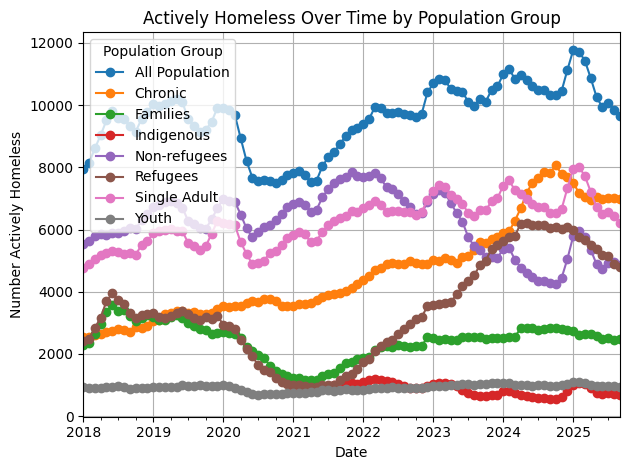

In [33]:
sys_flow['date(mmm-yy)'] = pd.to_datetime(sys_flow['date(mmm-yy)'], format='%b-%y')
pivot_df = sys_flow.pivot(index='date(mmm-yy)', columns='population_group', values='actively_homeless')
pivot_df = pivot_df.sort_index()

plt.figure(figsize=(12, 7))
pivot_df.plot(kind='line', marker='o')

plt.title("Actively Homeless Over Time by Population Group")
plt.xlabel("Date")
plt.ylabel("Number Actively Homeless")
plt.legend(title="Population Group")
plt.grid(True)
plt.tight_layout()
plt.show()